# Export onnx with your trained weights

In [2]:
# revise the code according to your model
# the second line is the location of exporting script, base on your nature of your task (classification/ detection/ segmentation)
# the third line is the location of configs of your model
# the fourth line is the location of weights (pth) of your model
# the fifth line is a sample of image
# the sixth line is exporting location
# the seventh line is choosing model to run on cpu or cuda

In [1]:
%run mmdeploy/tools/deploy.py \
mmdeploy/configs/mmseg/segmentation_onnxruntime_dynamic.py \
mmsegmentation/work_dirs/tutorial/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py \
mmsegmentation/work_dirs/tutorial/iter_200.pth \
mmsegmentation/iccv09Data/images/6000124.jpg \
--work-dir mmdeploy_model/pspnet \
--device cuda

04/23 11:54:08 - mmengine - INFO - Start pipeline mmdeploy.apis.pytorch2onnx.torch2onnx in subprocess
04/23 11:54:09 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "Codebases" registry tree. As a workaround, the current "Codebases" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initialized.
04/23 11:54:09 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "mmseg_tasks" registry tree. As a workaround, the current "mmseg_tasks" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initialized.


/home/test/MMdet/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: mmsegmentation/work_dirs/tutorial/iter_200.pth
04/23 11:54:09 - mmengine - WARNING - DeprecationWarning: get_onnx_config will be deprecated in the future. 
04/23 11:54:09 - mmengine - INFO - Export PyTorch model to ONNX: mmdeploy_model/pspnet/end2end.onnx.


/home/test/MMdet/mmdeploy/mmdeploy/core/optimizers/function_marker.py:160: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  ys_shape = tuple(int(s) for s in ys.shape)
/home/test/MMdet/mmdeploy/mmdeploy/pytorch/functions/adaptive_pool.py:26: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  k = [int(size[i] / output_size[i]) for i in range(0, len(size))]
/home/test/MMdet/mmdeploy/mmdeploy/codebase/mmseg/models/segmentors/base.py:61: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Py

04/23 11:54:10 - mmengine - WARNING - `adaptive_avg_pool2d` would be replaced to `avg_pool2d` explicitly
04/23 11:54:10 - mmengine - INFO - Execute onnx optimize passes.
04/23 11:54:11 - mmengine - INFO - Finish pipeline mmdeploy.apis.pytorch2onnx.torch2onnx
04/23 11:54:12 - mmengine - INFO - Start pipeline mmdeploy.apis.utils.utils.to_backend in main process
04/23 11:54:12 - mmengine - INFO - Finish pipeline mmdeploy.apis.utils.utils.to_backend
04/23 11:54:12 - mmengine - INFO - visualize onnxruntime model start.
04/23 11:54:15 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "Codebases" registry tree. As a workaround, the current "Codebases" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initialized.
04/23 11:54:15 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "mmseg_tasks" registry tree

2025-04-23 11:54:15.261121556 [W:onnxruntime:, session_state.cc:1263 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2025-04-23 11:54:15.261136308 [W:onnxruntime:, session_state.cc:1265 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


04/23 11:54:15 - mmengine - WARNING - expect input device cuda but get cuda:0.
04/23 11:54:16 - mmengine - INFO - visualize onnxruntime model success.
04/23 11:54:16 - mmengine - INFO - visualize pytorch model start.
04/23 11:54:19 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "Codebases" registry tree. As a workaround, the current "Codebases" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initialized.
04/23 11:54:19 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "mmseg_tasks" registry tree. As a workaround, the current "mmseg_tasks" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initialized.


/home/test/MMdet/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: mmsegmentation/work_dirs/tutorial/iter_200.pth
04/23 11:54:20 - mmengine - INFO - visualize pytorch model success.
04/23 11:54:20 - mmengine - INFO - All process success.


# Inference the onnx

In [2]:
# providers set provider priority cuda or cpu
import onnxruntime
sess = onnxruntime.InferenceSession("mmdeploy_model/resnet/end2end.onnx", providers=["CUDAExecutionProvider"])
print(sess.get_providers())

['CUDAExecutionProvider', 'CPUExecutionProvider']


In [2]:
#Semantic segmentation
from mmdeploy.apis import inference_model
model_cfg = 'mmsegmentation/work_dirs/tutorial/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
deploy_cfg = 'mmdeploy/configs/mmseg/segmentation_onnxruntime_dynamic.py'
backend_files = 'mmdeploy_model/pspnet/end2end.onnx'
image = 'mmsegmentation/iccv09Data/images/6000124.jpg'
result = inference_model(
    model_cfg = model_cfg,
    deploy_cfg = deploy_cfg,
    backend_files = [backend_files],
    img = image,
    device='cuda'
)
print(result)

04/23 11:58:07 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "Codebases" registry tree. As a workaround, the current "Codebases" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initialized.
04/23 11:58:07 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "mmseg_tasks" registry tree. As a workaround, the current "mmseg_tasks" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initialized.
04/23 11:58:07 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "backend_segmentors" registry tree. As a workaround, the current "backend_segmentors" registry in "mmdeploy" is used to build instance. This may cause unexpected failure when runni

2025-04-23 11:58:07.783043651 [W:onnxruntime:, session_state.cc:1263 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2025-04-23 11:58:07.783062148 [W:onnxruntime:, session_state.cc:1265 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


[<SegDataSample(

    META INFORMATION
    img_path: None
    img_shape: (240, 320)
    ori_shape: (240, 320)
    scale_factor: (1.0, 1.0)

    DATA FIELDS
    pred_sem_seg: <PixelData(
        
            META INFORMATION
        
            DATA FIELDS
            data: tensor([[[1, 1, 1,  ..., 5, 5, 5],
                         [1, 1, 1,  ..., 5, 5, 5],
                         [1, 1, 1,  ..., 5, 5, 5],
                         ...,
                         [2, 2, 2,  ..., 2, 2, 2],
                         [2, 2, 2,  ..., 2, 2, 2],
                         [2, 2, 2,  ..., 2, 2, 2]]])
        ) at 0x7b431a9e56c0>
) at 0x7b431a9e5750>]


/home/test/MMdet/mmengine/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


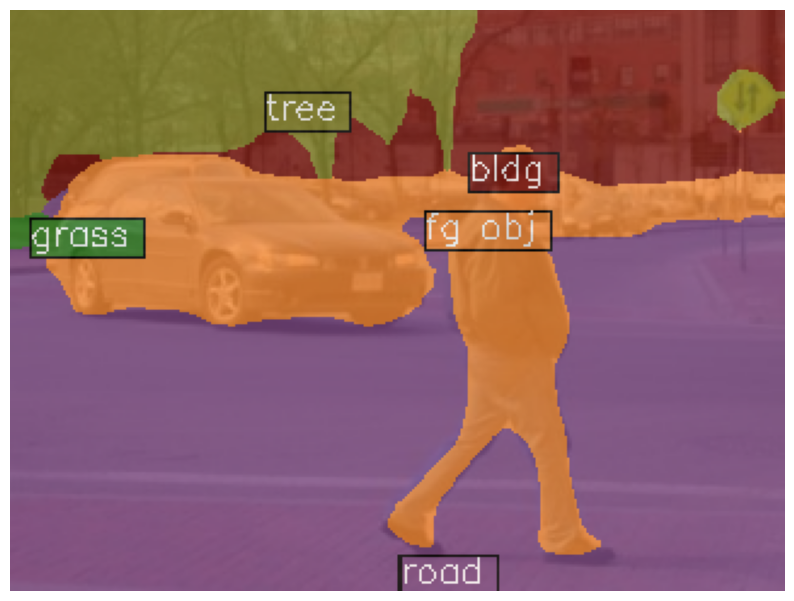

In [3]:
# plot the detection
import mmcv
from mmdet.registry import VISUALIZERS
import cv2
import numpy as np
from mmdeploy.utils import get_input_shape, load_config
import matplotlib.pyplot as plt
# read image
img = mmcv.imread(image)
img = mmcv.imconvert(img, 'bgr', 'rgb')

# initialize visualizer
deploy_cfg, model_cfg = load_config(deploy_cfg, model_cfg)
visualizer = VISUALIZERS.build(model_cfg.visualizer)
visualizer.dataset_meta = {
    'classes': ('sky', 'tree', 'road', 'grass', 'water', 'bldg', 'mntn', 'fg obj'),
    'palette': [[128, 128, 128], [129, 127, 38], [120, 69, 125], [53, 125, 34],
           [0, 11, 123], [118, 20, 12], [122, 81, 25], [241, 134, 51]],
}

# Now use this filtered_result for visualization
visualizer.add_datasample(
    'result',
    img,
    data_sample=result[0],
    draw_gt=False,
    wait_time=0
)
# draw
drawn_img = visualizer.get_image()
# plot with plt
plt.figure(figsize=(10, 8))
plt.imshow(drawn_img)
plt.axis('off')
plt.show()

Available providers: ['CPUExecutionProvider']


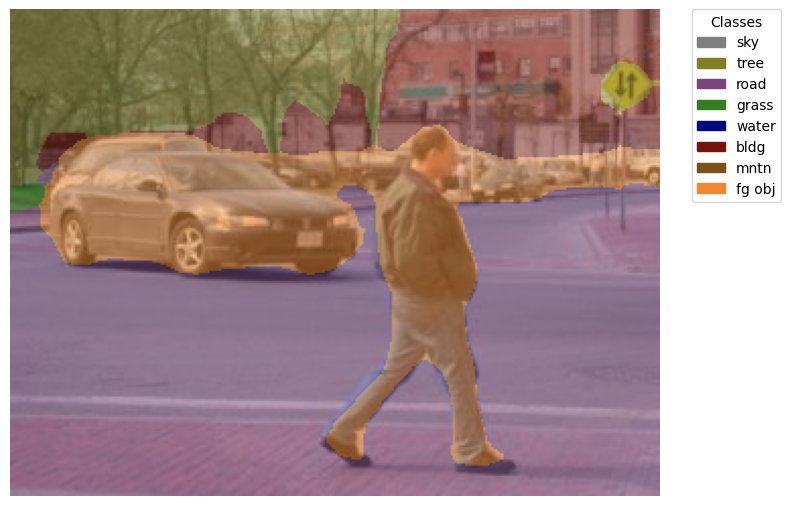

In [7]:
#Instance segmentation without torch (may have little difference with official)
import onnxruntime
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as mpatches

def preprocess_image(image):
    ori_shape = image.shape[:2]  # (H, W)

    '''
    according to config
        dataset=dict(
            pipeline=[
                dict(type='LoadImageFromFile'),
                dict(keep_ratio=True, scale=(
                    320,
                    240,
                ), type='Resize'),
    Modified resize logic:
    - Short edge at least 240
    - Long edge at most 320
    - Keep aspect ratio
    - If requirements conflict, prioritize 320 limit
    '''
    h, w = ori_shape
    min_size = 240
    max_size = 320
    
    # Calculate scale factors for both dimensions
    scale1 = min_size / min(h, w)
    scale2 = max_size / max(h, w)
    
    # Use the smaller scale to meet both requirements
    scale = min(scale1, scale2)
    
    new_h, new_w = int(h * scale), int(w * scale)
    resized = cv2.resize(image, (new_w, new_h))

    '''
    according to config
        data_preprocessor=dict(
            bgr_to_rgb=True,
            mean=[
                123.675,
                116.28,
                103.53,
            ],
            pad_val=0,
            seg_pad_val=255,
            size=(
                256,
                256,
            ),
            std=[
                58.395,
                57.12,
                57.375,
            ],
    Normalization (bgr_to_rgb=True, so cvtColor)
    '''
    resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB) 
    mean = np.array([123.675, 116.28, 103.53])
    std = np.array([58.395, 57.12, 57.375])
    normalized_image = (resized - mean) / std

    # Transpose to CHW layout
    normalized_image = normalized_image.transpose(2, 0, 1)

    meta = {
        'img_shape': (new_h, new_w),
        'scale_factor': scale,
        'ori_shape': ori_shape
    }

    return normalized_image, meta


sess = onnxruntime.InferenceSession("mmdeploy_model/pspnet/end2end.onnx", providers=["CPUExecutionProvider"])
print("Available providers:", sess.get_providers())

# Load and preprocess the image
image = cv2.imread("mmsegmentation/iccv09Data/images/6000124.jpg")

result, meta = preprocess_image(image)

# Get the model's input name (usually 'input' or something similar)
input_name = sess.get_inputs()[0].name

# Run inference on the input image
outputs = sess.run(None, {input_name: [result]})

recover_mask=cv2.resize(outputs[0][0,0,:,:].astype(np.uint8), (meta['ori_shape'][1], meta['ori_shape'][0]), interpolation=cv2.INTER_NEAREST)
palette= [[128, 128, 128], [129, 127, 38], [120, 69, 125], [53, 125, 34],
           [0, 11, 123], [118, 20, 12], [122, 81, 25], [241, 134, 51]]
classes= ['sky', 'tree', 'road', 'grass', 'water', 'bldg', 'mntn', 'fg obj']

def apply_palette(recover_mask, palette):
    # Convert palette to NumPy array for efficient indexing
    palette_array = np.array(palette, dtype=np.uint8)

    # Ensure recover_mask is a valid index array
    assert recover_mask.ndim == 2, "recover_mask should be 2D"
    assert recover_mask.max() < len(palette), "Index in recover_mask exceeds palette size"

    # Map each index to the corresponding RGB color
    color_image = palette_array[recover_mask]

    return color_image  # shape: (H, W, 3)

rgb_mask = apply_palette(recover_mask, palette)

fig, ax = plt.subplots(1, figsize=(8, 8))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ax.imshow(image)
plt.imshow(rgb_mask, alpha=0.5)
plt.axis("off")

legend_patches = [mpatches.Patch(color=np.array(color) / 255.0, label=cls_name)
                  for color, cls_name in zip(palette, classes)]
# Add legend (class-color bar)
plt.legend(handles=legend_patches,
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.,
           title="Classes",
           fontsize='medium')

plt.tight_layout()
plt.show()